In [1]:
# load data from multiple data source
import tushare as ts
import numpy as np
import pandas as pd

tushare_token = '1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72'  
# 请在 tushare.pro 网站注册并且告知学生身份，可以取得你的token
pro = ts.pro_api(tushare_token)

In [2]:
def collect_stock_data_pro(code, start_date, end_date):
    try:
        stk_data = pro.daily(ts_code = code, start_date =start_date , end_date = end_date)
        
        return stk_data
    except:
        print('Stock '+code+' could not collect from Tushare Pro')

In [3]:
def random_pick_stocks_code_pro(n): 
    stock_list = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
    ind = [x[0] for x in list(np.random.randint(low = 0, high = len(stock_list), size = (n, 1)))]
    return list(stock_list.iloc[ind]['ts_code'])


In [4]:
start_date='20170701'
end_date='20200730'
n = 3 # number of stocks you wanna collect from Tushare

codes = random_pick_stocks_code_pro(n)
stock_list = []
for c in codes:
    stock_info = {}
    stock_info['code'] =  c
    stock_info['data'] = collect_stock_data_pro(c, start_date, end_date)
    stock_list.append(stock_info)

### The Sharpe Ratio

The Sharpe ratio is perhaps the most widely used tool for evaluating the risk-adjusted rate of return on investment portfolios. It does so by comparing the actual or expected return on an investment to the return on a risk-free investment, such as bond. It compares the two rates of return, factoring in the standard deviation for the investment portfolio, to provide an investor with an idea of how much additional gain he or she is receiving (if any) in return for taking on the additional risk associated with investing in equities.

#### Daily Stock Returns and Sharpe Ratio Calculation
- Calculate the daily stock returns for the two investment opportunities i.e. stocks and CIS300 and name as “stock_returns” and “benchmark_returns”.
- Calculate the relative performance of stocks vs. the benchmark by taking the difference in returns between stock_returns and benchmark_returns for each day. Name it as “excess_returns”.
- Calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark. Name it as “avg_excess_returns”.
- Calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the benchmark. Name it as “std_excess_returns”.
- Compute the ratio of avg_excess_returns and std_excess_returns. The result is now finally the Sharpe ratio and indicates how much more or less return the investment opportunity under consideration yields per unit of risk.
- Note that Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we’ll use the square root of the number of trading days.

In [ ]:
# calculate daily stock returns for the banks
stock_returns = stock_list[0]['data'].pct_chg

# calculate daily stock returns for S&P
benchmark_returns = benchmark.pct_change()

# calculate the difference in daily returns for stocks vs S&P
excess_returns = stock_returns.sub(benchmark_returns, axis=0)

# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='Average of excess return')

In [ ]:
# calculate the standard deviation for daily excess return
std_excess_return = excess_returns.std()
std_excess_return.plot.bar(title='Standard Deviation of the excess return')

In [ ]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(std_excess_return)
# annualize the sharpe ratio
ann = np.sqrt(len(benchmark))
annual_sharpe_ratio = daily_sharpe_ratio.mul(ann)
annual_sharpe_ratio.plot.bar(title='Sharpe Ratio: Stocks vs CIS 300')

#### Information Ratio

The information ratio in finance is one of the most important ratios in **active management**. The appraisal ratio measures the level of outperformance of an active strategy over the benchmark. 

$$IR = \frac{E(r_s-r_b)}{std(r_s-r_b)}$$

where $r_s$ is the strategy return and $r_b$ is the benchmark return, and the $std(r_s-r_b)$ could be interpreted as the **tracking error**. The difference between both is the **active return**. As such, the IR is equal to the expected active return divided by the tracking error. In other words, the ratio measures the active return of the investor's strategy divided by the amount of risk that he takes relative the the benchmark. 

##### Key Concept

1. The information ratio is a measurement of portfolio returns above the returns of a benchmark. 
2. The information ratio is used to evaluate the skill of a portfolio manager at generating returns in excess of a given benchmark.
3. A higher (0.3 - 0.4 would be fairly good) IR result implies a better portfolio manager who's achieving a higher return in excess of the benchmark, given the risk taken


The information ratio identifies how much a fund has exceeded a benchmark. Higher information ratios indicate a desired level of consistency, whereas low information ratios indicate the opposite. Many investors use the information ratio when selecting exchange-traded funds (ETFs) or mutual funds based on their preferred risk profiles. Of course, past performance is not an indicator of future results, but the IR is used to determine whether a portfolio is exceeding a benchmark index fund.

#### Limitation
Comparing multiple funds against a benchmark is difficult to interpret because the funds might have different securities, asset allocations for each sector and entry points in their investments. As with any single financial ratio, it's best to look at additional types of ratios and other financial metrics to make a more comprehensive and informed investment decision.

### Sortino Ratio
The Sortino ratio is a variation of the Sharpe ratio that differentiates **harmful volatility** from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.

#### Formula and Calculation of Sortino Ratio
$$\frac{r_s-r_f}{\delta_d}$$

where $r_s$ is the actual strategy return, $r_f$ is the risk-free rate and $\delta_d$ is standard deviation of the downside

#### Key points
- The Sortino ratio differs from the Sharpe ratio in that it only considers the standard deviation of the downside risk, rather than that of the entire (upside + downside) risk.
- Because the Sortino ratio focuses only on the negative deviation of a portfolio's returns from the mean, it is thought to give a better view of a portfolio's risk-adjusted performance since positive volatility is a benefit.
- The Sortino ratio is a useful way for investors, analysts, and portfolio managers to evaluate an invesment's return for a given level of bad risk.

#### Maximum drawdown

Maximum drawdown is defined as the **peak-to-trough decline** of an investment during a specific period. It is usually quoted as a percentage of the peak value. The maximum drawdown can be calculated based on absolute returns, in order to identify strategies that suffer less during market downturns, such as low-volatility strategies. However, the maximum drawdown can also be calculated based on returns relative to a benchmark index, for identifying strategies that show steady outperformance over time.

We use maximum drawdown as one of the key statistics for evaluating our quantitative investment strategies

$$MDD_T = \frac{(P-L)}{P}$$

where $P$ is the peak value before largest drop during preiod $T$, and $L$ is the lowest value before new high estabilished

- Maximum drawdown (MDD) is a measure of an asset's largest price drop from a peak to a trough.
- Maximum drawdown is considered to be an indicator of downside risk, with large MDDs suggesting that down movements could be volatile.

In [108]:
st = stock_list[0]['data'][['trade_date', 'close']].copy()

def maxdd(st):
    # st should be a DataFrame with two columns ['trade_date', 'close']
    end_day = st['trade_date'].loc[st['close'].sub(st['close'].expanding().max(), axis=0).idxmin()]
    start_day = st[st['trade_date']<end_day].sort_values(by = 'close', ascending = False).iloc[0]['trade_date']
    dd = round(abs(st['close'].sub(st['close'].expanding().max(), axis=0).div(st['close'].expanding().max(), axis=0).min()) * 100)
    return dd, start_day, end_day

dd, start_day, end_day = maxdd(st)

print('Max drawdown is {}, started from {} and end by {}.'.format(dd, start_day, end_day))

Max drawdown is 64, started from 20170904 and end by 20181012.


In [1]:
import pandas as pd  
import numpy as np
import talib as ta
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline   
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#使用tushare获取交易数据
#设置token
import tushare as ts 
#注意token更换为你在tushare网站上获取的
token='1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72' 
pro=ts.pro_api(token)
index={'上证综指': '000001.SH',
        '深证成指': '399001.SZ',
        '沪深300': '000300.SH',
        '创业板指': '399006.SZ',
        '上证50': '000016.SH',
        '中证500': '000905.SH',
        '中小板指': '399005.SZ',
        '上证180': '000010.SH'}
#获取当前交易的股票代码和名称
def get_code():
    df = pro.stock_basic(exchange='', list_status='L')
    codes=df.ts_code.values
    names=df.name.values
    stock=dict(zip(names,codes))
    #合并指数和个股成一个字典
    stocks=dict(stock,**index)
    return stocks    
#获取行情数据
def get_daily_data(stock,start,end):
    #如果代码在字典index里，则取的是指数数据
    code=get_code()[stock]
    if code in index.values():
        df=pro.index_daily(ts_code=code,start_date=start, end_date=end)
    #否则取的是个股数据
    else:
        df=pro.daily(ts_code=code, adj='qfq',start_date=start, end_date=end)
    #将交易日期设置为索引值
    df.index=pd.to_datetime(df.trade_date)
    df=df.sort_index()
    #计算收益率
    df['ret']=df.close/df.close.shift(1)-1
    return df

In [2]:
hs=get_daily_data('沪深300','20180101','')[['close','open','high','low','vol']]
#最近N1个交易日最高价
hs['up']=ta.MAX(hs.high,timeperiod=20).shift(1)
#最近N2个交易日最低价
hs['down']=ta.MIN(hs.low,timeperiod=10).shift(1)
#每日真实波动幅度
hs['ATR']=ta.ATR(hs.high,hs.low,hs.close,timeperiod=20)
hs.tail()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [22]:
def my_strategy(data):
    x1=data.close>data.up
    x2=data.close.shift(1)<data.up.shift(1)
    x=x1&x2
    y1=data.close<data.down
    y2=data.close.shift(1)>data.down.shift(1)
    y=y1&y2
    data.loc[x,'signal']='buy'
    data.loc[y,'signal']='sell'
    buy_date=(data[data.signal=='buy'].index).strftime('%Y%m%d')
    sell_date=(data[data.signal=='sell'].index).strftime('%Y%m%d')
    buy_close=data[data.signal=='buy'].close.round(2).tolist()
    sell_close=data[data.signal=='sell'].close.round(2).tolist()
    return (buy_date,buy_close,sell_date,sell_close)

#对K线图和唐奇安通道进行可视化
from pyecharts import *
# pip install pyecharts == 0.1.9.4
grid = Grid()
attr=[str(t) for t in hs.index.strftime('%Y%m%d')]
v1=np.array(hs.loc[:,['open','close','low','high']])
v2=np.array(hs.up)
v3=np.array(hs.down)
kline = Kline("沪深300唐奇安通道",title_text_size=15)
kline.add("K线图", attr, v1.round(1),is_datazoom_show=True,)
# 成交量
bar = Bar()
bar.add("成交量", attr, hs['vol'],tooltip_tragger="axis", is_legend_show=False, 
        is_yaxis_show=False, yaxis_max=5*max(hs["vol"]))
line = Line()
line.add("上轨线", attr, v2.round(1),is_datazoom_show=True,
         is_smooth=True,is_symbol_show=False,line_width=1.5)
line.add("下轨线", attr, v3.round(1),is_datazoom_show=True,
         is_smooth=True,is_symbol_show=False,line_width=1.5)
#添加买卖信号
bd,bc,sd,sc=my_strategy(hs)
es = EffectScatter("buy")
es.add( "sell", sd, sc, )
es.add("buy", bd, bc,symbol="triangle",)
overlap = Overlap(width=2000, height=600)
overlap.add(kline)
overlap.add(line)
overlap.add(bar,yaxis_index=1, is_add_yaxis=True)
overlap.add(es)
grid.add(overlap, grid_right="10%")
grid

NameError: name 'Grid' is not defined

In [16]:
#关掉pandas的warnings
pd.options.mode.chained_assignment = None
def strategy(stock,start,end,N1=20,N2=10):
    df=get_daily_data(stock,start,end)
    #最近N1个交易日最高价
    df['H_N1']=ta.MAX(df.high,timeperiod=N1)
    #最近N2个交易日最低价
    df['L_N2']=ta.MIN(df.low,timeperiod=N2)
    #当日收盘价>昨天最近N1个交易日最高点时发出信号设置为1
    buy_index=df[df.close>df['H_N1'].shift(1)].index
    df.loc[buy_index,'收盘信号']=1
    #将当日收盘价<昨天最近N2个交易日的最低点时收盘信号设置为0
    sell_index=df[df.close<df['L_N2'].shift(1)].index
    df.loc[sell_index,'收盘信号']=0
    df['当天仓位']=df['收盘信号'].shift(1)
    df['当天仓位'].fillna(method='ffill',inplace=True)
    d=df[df['当天仓位']==1].index[0]-timedelta(days=1)
    df1=df.loc[d:].copy()
    df1['ret'][0]=0
    df1['当天仓位'][0]=0
    #当仓位为1时，买入持仓，当仓位为0时，空仓，计算资金净值
    df1['策略净值']=(df1.ret.values*df1['当天仓位'].values+1.0).cumprod()
    df1['指数净值']=(df1.ret.values+1.0).cumprod()
    df1['策略收益率']=df1['策略净值']/df1['策略净值'].shift(1)-1
    df1['指数收益率']=df1.ret
    total_ret=df1[['策略净值','指数净值']].iloc[-1]-1
    annual_ret=pow(1+total_ret,250/len(df1))-1
    dd=(df1[['策略净值','指数净值']].cummax()-df1[['策略净值','指数净值']])/df1[['策略净值','指数净值']].cummax()
    d=dd.max()
    beta=df1[['策略收益率','指数收益率']].cov().iat[0,1]/df1['指数收益率'].var()
    alpha=(annual_ret['策略净值']-annual_ret['指数净值']*beta)
    exReturn=df1['策略收益率']-0.03/250
    sharper_atio=np.sqrt(len(exReturn))*exReturn.mean()/exReturn.std()
    TA1=round(total_ret['策略净值']*100,2)
    TA2=round(total_ret['指数净值']*100,2)
    AR1=round(annual_ret['策略净值']*100,2)
    AR2=round(annual_ret['指数净值']*100,2)
    MD1=round(d['策略净值']*100,2)
    MD2=round(d['指数净值']*100,2)
    S=round(sharper_atio,2)
    df1[['策略净值','指数净值']].plot(figsize=(15,7))
    plt.title('海龟交易策略简单回测',size=15)
    bbox = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    plt.text(df1.index[int(len(df1)/5)], df1['指数净值'].max()/1.5, f'累计收益率：\
策略{TA1}%，指数{TA2}%;\n年化收益率：策略{AR1}%，指数{AR2}%；\n最大回撤：  策略{MD1}%，指数{MD2}%;\n\
策略alpha: {round(alpha,2)}，策略beta：{round(beta,2)}; \n夏普比率：  {S}',size=13,bbox=bbox)  
    plt.xlabel('')
    ax=plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()
    #return df1.loc[:,['close','ret','H_N1','L_N2','当天仓位','策略净值','指数净值']]

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


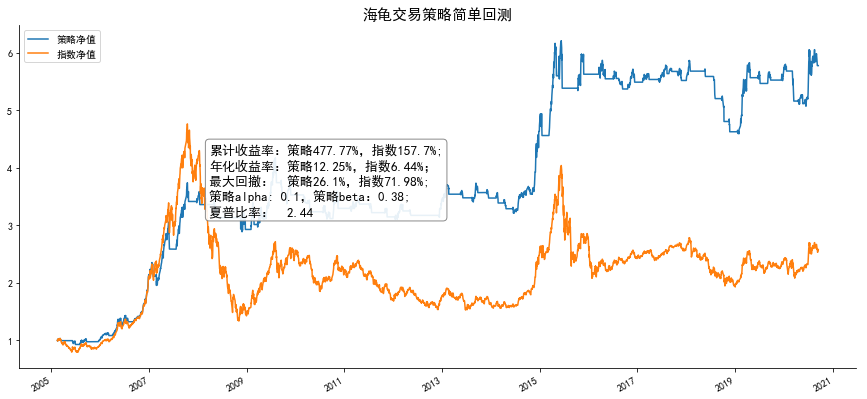

In [17]:
strategy('上证综指','20050101','')

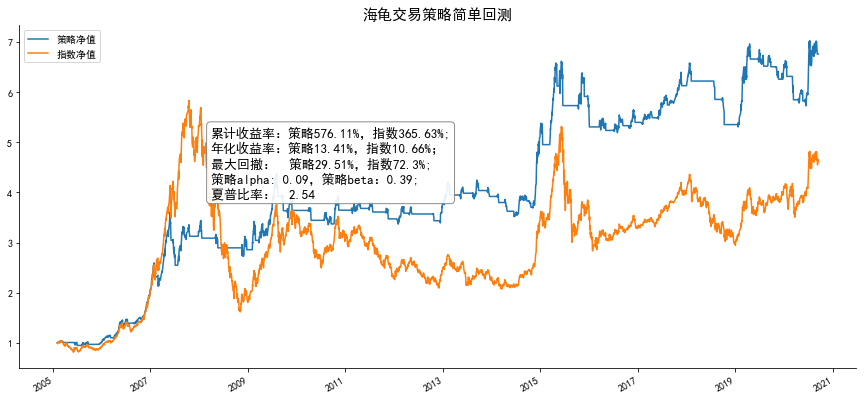

In [18]:
strategy('沪深300','','')

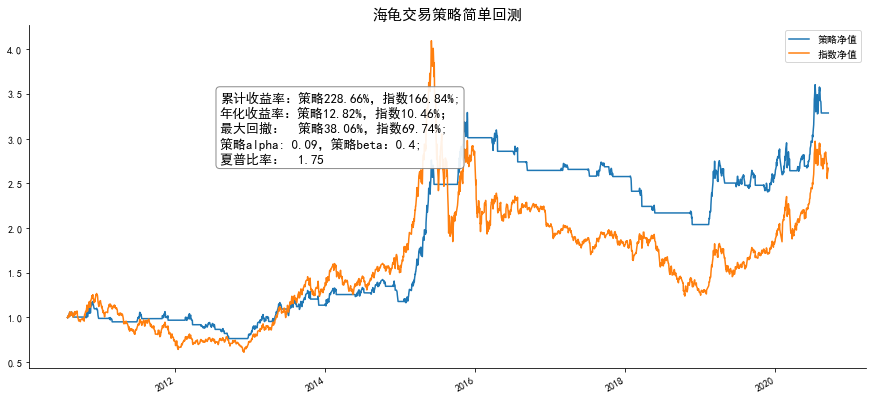

In [19]:
strategy('创业板指','','')

In [ ]:
strategy('沪深300','20180101','')

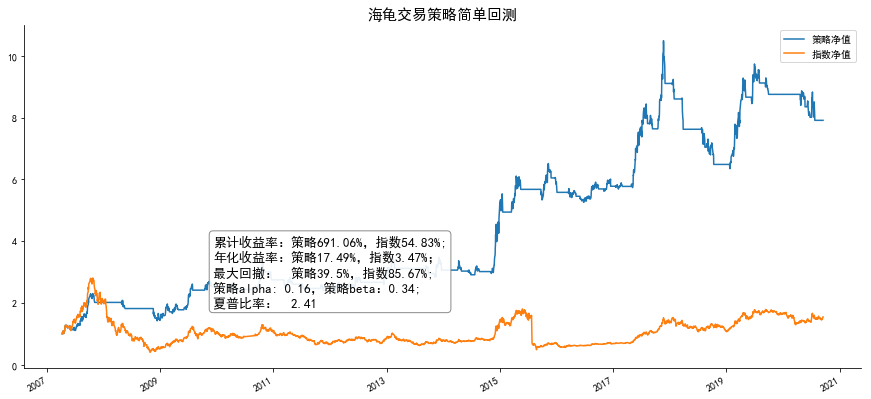

In [20]:
strategy('中国平安','20050101','',N1=20,N2=10)

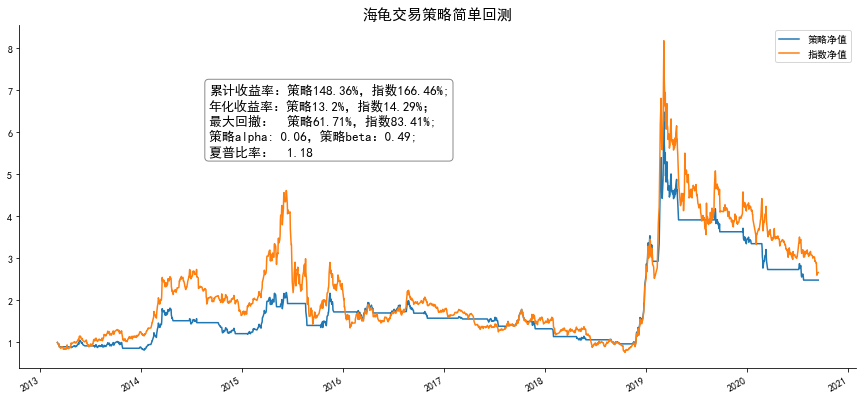

In [21]:
strategy('东方通信','20130101','',N1=20,N2=10)

In [15]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts.charts import Bar
from pyecharts import options as opts
import pyecharts

pyecharts.globals._WarningControl.ShowWarning = False
# V1 版本开始支持链式调用
bar = (
    Bar()
    .add_xaxis(["衬衫", "毛衣", "领带", "裤子", "风衣", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [114, 55, 27, 101, 125, 27, 105])
    .add_yaxis("商家B", [57, 134, 137, 129, 145, 60, 49])
    .set_global_opts(title_opts=opts.TitleOpts(title="某商场销售情况"))
)
bar.render_notebook()

# 不习惯链式调用的开发者依旧可以单独调用方法
bar = Bar()
bar.add_xaxis(["衬衫", "毛衣", "领带", "裤子", "风衣", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [114, 55, 27, 101, 125, 27, 105])
bar.add_yaxis("商家B", [57, 134, 137, 129, 145, 60, 49])
bar.set_global_opts(title_opts=opts.TitleOpts(title="某商场销售情况"))
bar.render_notebook()

In [14]:
load_javascript()

NameError: name 'load_javascript' is not defined